In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
from numpy import linalg as LA

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [10]:
FILE_NAME = 'emb_64_64_linear_relu_20_20_no_remove'

In [18]:
emb = pd.read_csv(f'./emb/{FILE_NAME}.csv', index_col=0)

k_emb = emb[emb['type'] == 1].copy(deep=True)
gm_emb = emb[emb['type'] == 2].copy(deep=True)
# gene_emb = emb[emb['type'] == 0].copy(deep=True)

emb.drop('type' , axis='columns', inplace=True)
k_emb.drop('type', axis='columns', inplace=True)
gm_emb.drop('type', axis='columns', inplace=True)
# gene_emb.drop('type', axis='columns', inplace=True)

print(f'K562: {k_emb.shape}')
print(f'GM12878: {gm_emb.shape}')
# print(f'Gene: {gene_emb.shape}')
emb.dtypes

K562: (69, 64)
GM12878: (69, 64)


0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
59    float64
60    float64
61    float64
62    float64
63    float64
Length: 64, dtype: object

## Check for normalization

In [27]:
is_normalized = pd.DataFrame(LA.norm(emb.to_numpy(), axis=1), index=emb.index, columns=['sqr_sum'])
is_normalized['is_normalized'] = is_normalized['sqr_sum'].map(lambda x: x - 1 < 1e-5)
from collections import Counter
Counter(is_normalized['is_normalized'])

Counter({True: 18573})

The embedding is indeed normalized

## Plot embedding of TFs

In [32]:
tf_emb = pd.concat([gm_emb, k_emb])
all_embeddings = tf_emb.to_numpy()
nodes = tf_emb.index.to_numpy()

In [35]:
trans = TSNE(n_components=2)
emb_transformed = pd.DataFrame(trans.fit_transform(all_embeddings), index=nodes)
emb_transformed['type'] = emb_transformed.index.map(lambda name: 1 if name[-2:] == '_k' else 2)
emb_transformed

,0,1,type
MAFK_gm,-1.000072,-4.942113,2
NFYA_gm,6.487600,8.075071,2
ZBTB33_gm,4.790697,0.936970,2
SIN3A_gm,-3.061520,-4.729941,2
POLR2AphosphoS5_gm,-0.607005,-2.306972,2
...,...,...,...
NBN_k,3.946862,6.612142,1
TBP_k,-5.203712,-4.981806,1
SIN3A_k,2.067872,5.672982,1
JUND_k,-5.357187,0.492517,1


In [50]:
emb_transformed.iloc[2][0]

4.790696620941162

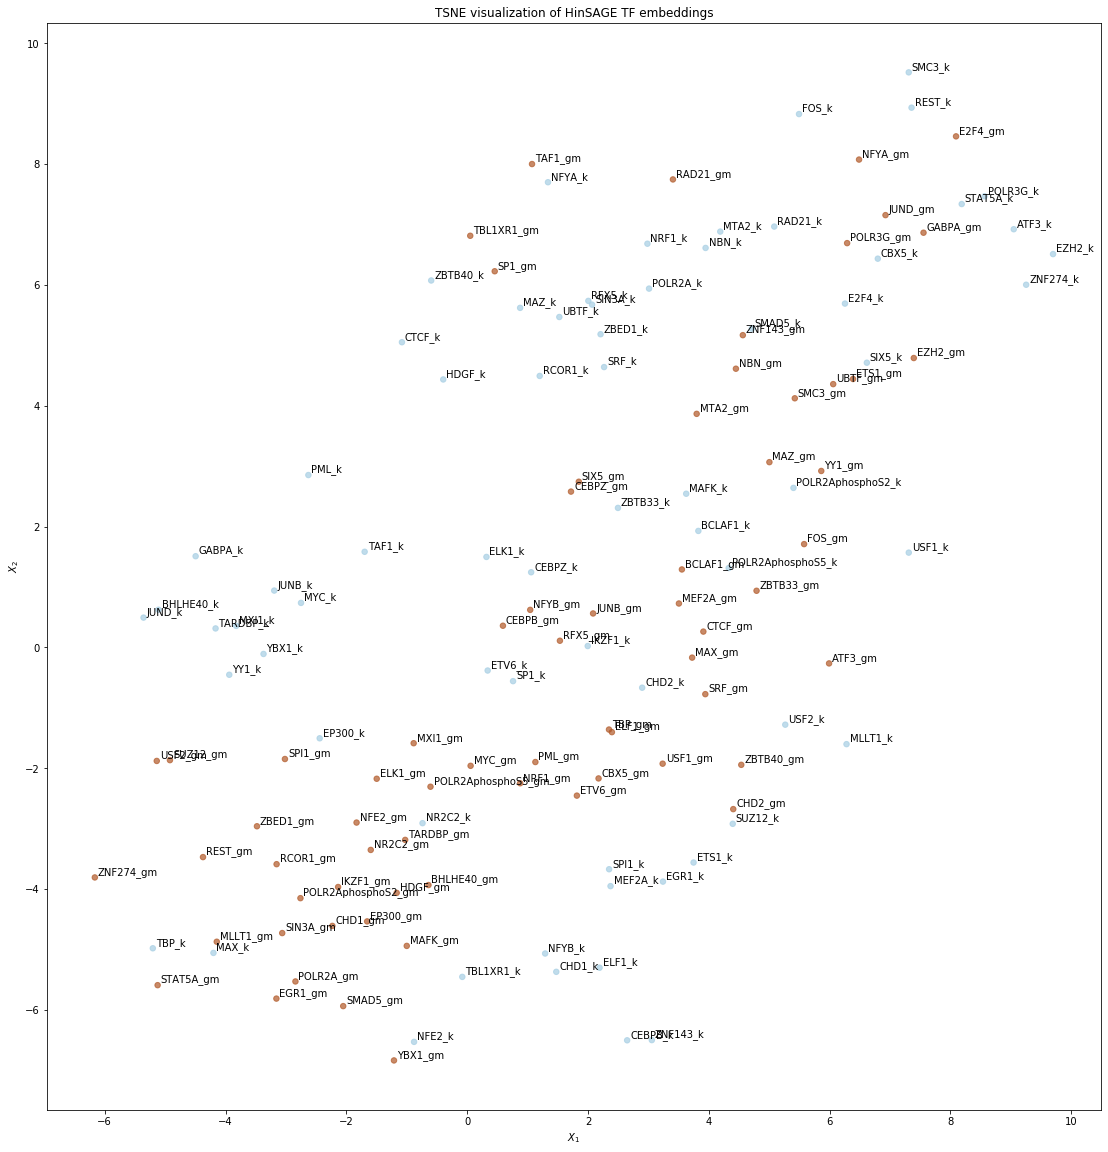

In [63]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["type"],
    cmap="Paired",
    alpha=alpha,
    s=30
)
for i, txt in enumerate(nodes):
    ax.annotate(txt, (emb_transformed.iloc[i][0]+.05, emb_transformed.iloc[i][1]+.05))
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(f"TSNE visualization of HinSAGE TF embeddings")

# plt.savefig(f'./img/{FILE_NAME}_TF.png', dpi=150)
plt.show()

## Calculate embedding distance
1. Traverse all the combinations of [tf, gene], calculate L2 distance


In [5]:
# def get_emb(name):
#     return emb[emb.index == name].to_numpy()

In [6]:
gene_names = gene_emb.index


# K562
k_names = k_emb.index

iterables = [list(k_names), list(gene_names)] 
idx = pd.MultiIndex.from_product(iterables, names=['tf', 'gene'])

k_emb_dist = pd.DataFrame([0] * len(idx), index=idx, columns=['distance'])

k_emb_dist['tf_emb'] = k_emb_dist.index.map(lambda x: emb.loc[x[0]])
k_emb_dist['gene_emb'] = k_emb_dist.index.map(lambda x: emb.loc[x[1]])

k_emb_dist

distance  \
tf       gene                 
FOS_k    PRPF3            0   
         RAB34            0   
         MSS51            0   
         MC3R             0   
         PHYHIP           0   
...                     ...   
ZBTB40_k KRTAP6-3         0   
         TIMM9            0   
         EMILIN2          0   
         CLDN19           0   
         LSM2             0   

                                                              tf_emb  \
tf       gene                                                          
FOS_k    PRPF3     0     0.000000
1     0.000000
2     0.000000
3...   
         RAB34     0     0.000000
1     0.000000
2     0.000000
3...   
         MSS51     0     0.000000
1     0.000000
2     0.000000
3...   
         MC3R      0     0.000000
1     0.000000
2     0.000000
3...   
         PHYHIP    0     0.000000
1     0.000000
2     0.000000
3...   
...                                                              ...   
ZBTB40_k KRTAP6-3  0     0.000000
1     0.000000
2     0.000000
3...   
         TIMM9     0     0.000000
1     0.000000
2     0.000000
3...   
         EMILIN2   0     0.000000
1     0.000000
2     0.000000
3...   
         CLDN19    0     0.000000
1     0.000000
2     0.000000
3...   
         LSM2      0     0.000000
1     0.000000
2     0.000000
3...   

                                                            gene_emb  
tf       gene                                                         
FOS_k    PRPF3     0     0.142156
1     0.000000
2     0.000000
3...  
         RAB34     0     0.208801
1     0.000000
2     0.000000
3...  
         MSS51     0     0.000000
1     0.000000
2     0.000000
3...  
         MC3R      0     0.000000
1     0.000000
2     0.000000
3...  
         PHYHIP    0     0.042144
1     0.000000
2     0.000000
3...  
...                                                              ...  
ZBTB40_k KRTAP6-3  0     0.000000
1     0.000000
2     0.000000
3...  
         TIMM9     0     0.204622
1     0.000000
2     0.000000
3...  
         EMILIN2   0     0.058832
1     0.000000
2     0.000000
3...  
         CLDN19    0     0.146817
1     0.000000
2     0.000000
3...  
         LSM2      0     0.060094
1     0.000000
2     0.000000
3...  

[1270152 rows x 3 columns]

In [7]:
# GM12878
gm_names = gm_emb.index

iterables = [list(gm_names), list(gene_names)]
idx = pd.MultiIndex.from_product(iterables, names=['tf', 'gene'])

gm_emb_dist = pd.DataFrame([0] * len(idx), index=idx, columns=['distance'])

gm_emb_dist['tf_emb'] = gm_emb_dist.index.map(lambda x: emb.loc[x[0]])
gm_emb_dist['gene_emb'] = gm_emb_dist.index.map(lambda x: emb.loc[x[1]])

gm_emb_dist

distance                                             tf_emb  \
tf      gene                                                                    
MAFK_gm PRPF3            0  0     0.000000
1     0.000000
2     0.000000
3...   
        RAB34            0  0     0.000000
1     0.000000
2     0.000000
3...   
        MSS51            0  0     0.000000
1     0.000000
2     0.000000
3...   
        MC3R             0  0     0.000000
1     0.000000
2     0.000000
3...   
        PHYHIP           0  0     0.000000
1     0.000000
2     0.000000
3...   
...                    ...                                                ...   
SPI1_gm KRTAP6-3         0  0     0.000000
1     0.000000
2     0.000000
3...   
        TIMM9            0  0     0.000000
1     0.000000
2     0.000000
3...   
        EMILIN2          0  0     0.000000
1     0.000000
2     0.000000
3...   
        CLDN19           0  0     0.000000
1     0.000000
2     0.000000
3...   
        LSM2             0  0     0.000000
1     0.000000
2     0.000000
3...   

                                                           gene_emb  
tf      gene                                                         
MAFK_gm PRPF3     0     0.142156
1     0.000000
2     0.000000
3...  
        RAB34     0     0.208801
1     0.000000
2     0.000000
3...  
        MSS51     0     0.000000
1     0.000000
2     0.000000
3...  
        MC3R      0     0.000000
1     0.000000
2     0.000000
3...  
        PHYHIP    0     0.042144
1     0.000000
2     0.000000
3...  
...                                                             ...  
SPI1_gm KRTAP6-3  0     0.000000
1     0.000000
2     0.000000
3...  
        TIMM9     0     0.204622
1     0.000000
2     0.000000
3...  
        EMILIN2   0     0.058832
1     0.000000
2     0.000000
3...  
        CLDN19    0     0.146817
1     0.000000
2     0.000000
3...  
        LSM2      0     0.060094
1     0.000000
2     0.000000
3...  

[1270152 rows x 3 columns]

In [8]:
def get_dist(x):
    return LA.norm(x[0].to_numpy() - x[1].to_numpy())

k_emb_dist['distance'] = k_emb_dist[['tf_emb', 'gene_emb']].apply(get_dist, axis=1)
gm_emb_dist['distance'] = gm_emb_dist[['tf_emb', 'gene_emb']].apply(get_dist, axis=1)



In [9]:
k_emb_dist.sort_values(['distance'], inplace=True)
gm_emb_dist.sort_values(['distance'], inplace=True)

In [10]:
k_emb_dist['tf_name'] = k_emb_dist.index.map(lambda x: x[0][:-2])
gm_emb_dist['tf_name'] = gm_emb_dist.index.map(lambda x: x[0][:-3])

k_emb_dist['gene_name'] = k_emb_dist.index.map(lambda x: x[1])
gm_emb_dist['gene_name'] = gm_emb_dist.index.map(lambda x: x[1])

In [11]:
gm_emb_dist

distance  \
tf        gene                 
ZNF274_gm KLRC2     0.498787   
          KLRC1     0.498787   
          CES1      0.530443   
          PPAPDC3   0.532417   
          IL22RA1   0.533762   
...                      ...   
E2F4_gm   PCDHGA11  1.103580   
          YIPF6     1.106621   
          ENOX1     1.111631   
          ZNF174    1.125675   
          GRM1      1.135796   

                                                               tf_emb  \
tf        gene                                                          
ZNF274_gm KLRC2     0     0.000000
1     0.000000
2     0.000000
3...   
          KLRC1     0     0.000000
1     0.000000
2     0.000000
3...   
          CES1      0     0.000000
1     0.000000
2     0.000000
3...   
          PPAPDC3   0     0.000000
1     0.000000
2     0.000000
3...   
          IL22RA1   0     0.000000
1     0.000000
2     0.000000
3...   
...                                                               ...   
E2F4_gm   PCDHGA11  0     0.000000
1     0.000000
2     0.000000
3...   
          YIPF6     0     0.000000
1     0.000000
2     0.000000
3...   
          ENOX1     0     0.000000
1     0.000000
2     0.000000
3...   
          ZNF174    0     0.000000
1     0.000000
2     0.000000
3...   
          GRM1      0     0.000000
1     0.000000
2     0.000000
3...   

                                                             gene_emb tf_name  \
tf        gene                                                                  
ZNF274_gm KLRC2     0     0.000000
1     0.000000
2     0.000000
3...  ZNF274   
          KLRC1     0     0.000000
1     0.000000
2     0.000000
3...  ZNF274   
          CES1      0     0.037353
1     0.000000
2     0.000000
3...  ZNF274   
          PPAPDC3   0     0.000000
1     0.000000
2     0.000000
3...  ZNF274   
          IL22RA1   0     0.000000
1     0.000000
2     0.000000
3...  ZNF274   
...                                                               ...     ...   
E2F4_gm   PCDHGA11  0     0.336741
1     0.000000
2     0.000000
3...    E2F4   
          YIPF6     0     0.029229
1     0.000000
2     0.000000
3...    E2F4   
          ENOX1     0     0.160931
1     0.000000
2     0.000000
3...    E2F4   
          ZNF174    0     0.067812
1     0.000000
2     0.000000
3...    E2F4   
          GRM1      0     0.157989
1     0.000000
2     0.000000
3...    E2F4   

                   gene_name  
tf        gene                
ZNF274_gm KLRC2        KLRC2  
          KLRC1        KLRC1  
          CES1          CES1  
          PPAPDC3    PPAPDC3  
          IL22RA1    IL22RA1  
...                      ...  
E2F4_gm   PCDHGA11  PCDHGA11  
          YIPF6        YIPF6  
          ENOX1        ENOX1  
          ZNF174      ZNF174  
          GRM1          GRM1  

[1270152 rows x 5 columns]

In [12]:
gm_emb_dist_renamed = gm_emb_dist.set_index(['tf_name', 'gene_name'])

k_emb_dist_renamed = k_emb_dist.set_index(['tf_name', 'gene_name'])
gm_emb_dist_renamed

distance  \
tf_name gene_name             
ZNF274  KLRC2      0.498787   
        KLRC1      0.498787   
        CES1       0.530443   
        PPAPDC3    0.532417   
        IL22RA1    0.533762   
...                     ...   
E2F4    PCDHGA11   1.103580   
        YIPF6      1.106621   
        ENOX1      1.111631   
        ZNF174     1.125675   
        GRM1       1.135796   

                                                              tf_emb  \
tf_name gene_name                                                      
ZNF274  KLRC2      0     0.000000
1     0.000000
2     0.000000
3...   
        KLRC1      0     0.000000
1     0.000000
2     0.000000
3...   
        CES1       0     0.000000
1     0.000000
2     0.000000
3...   
        PPAPDC3    0     0.000000
1     0.000000
2     0.000000
3...   
        IL22RA1    0     0.000000
1     0.000000
2     0.000000
3...   
...                                                              ...   
E2F4    PCDHGA11   0     0.000000
1     0.000000
2     0.000000
3...   
        YIPF6      0     0.000000
1     0.000000
2     0.000000
3...   
        ENOX1      0     0.000000
1     0.000000
2     0.000000
3...   
        ZNF174     0     0.000000
1     0.000000
2     0.000000
3...   
        GRM1       0     0.000000
1     0.000000
2     0.000000
3...   

                                                            gene_emb  
tf_name gene_name                                                     
ZNF274  KLRC2      0     0.000000
1     0.000000
2     0.000000
3...  
        KLRC1      0     0.000000
1     0.000000
2     0.000000
3...  
        CES1       0     0.037353
1     0.000000
2     0.000000
3...  
        PPAPDC3    0     0.000000
1     0.000000
2     0.000000
3...  
        IL22RA1    0     0.000000
1     0.000000
2     0.000000
3...  
...                                                              ...  
E2F4    PCDHGA11   0     0.336741
1     0.000000
2     0.000000
3...  
        YIPF6      0     0.029229
1     0.000000
2     0.000000
3...  
        ENOX1      0     0.160931
1     0.000000
2     0.000000
3...  
        ZNF174     0     0.067812
1     0.000000
2     0.000000
3...  
        GRM1       0     0.157989
1     0.000000
2     0.000000
3...  

[1270152 rows x 3 columns]

In [13]:
gm_emb_dist_renamed.loc['NBN'].loc['GIGYF1']['distance']

0.8927638913978263

In [14]:
# k_emb_dist_renamed[['distance']].to_csv(f'./emb/{FILE_NAME}_k_dist.csv')

In [15]:
# gm_emb_dist_renamed[['distance']].to_csv(f'./emb/{FILE_NAME}_gm_dist.csv')

## Explore distance differece

In [16]:
gm_names = gm_emb.index
print(gm_names)

k_names = k_emb.index
print(k_names)

Index(['MAFK_gm', 'NFYA_gm', 'ZBTB33_gm', 'SIN3A_gm', 'POLR2AphosphoS5_gm',
       'ETS1_gm', 'GABPA_gm', 'EGR1_gm', 'NFYB_gm', 'CHD2_gm', 'BCLAF1_gm',
       'JUNB_gm', 'ELF1_gm', 'TBP_gm', 'TAF1_gm', 'NR2C2_gm', 'MAZ_gm',
       'USF1_gm', 'SMC3_gm', 'EP300_gm', 'ZNF274_gm', 'ZBED1_gm', 'RFX5_gm',
       'JUND_gm', 'SRF_gm', 'POLR2A_gm', 'E2F4_gm', 'CTCF_gm', 'PML_gm',
       'CBX5_gm', 'RAD21_gm', 'ATF3_gm', 'SMAD5_gm', 'MYC_gm', 'ELK1_gm',
       'RCOR1_gm', 'USF2_gm', 'MLLT1_gm', 'POLR3G_gm', 'YY1_gm', 'FOS_gm',
       'MXI1_gm', 'NBN_gm', 'UBTF_gm', 'EZH2_gm', 'MTA2_gm', 'BHLHE40_gm',
       'SIX5_gm', 'ETV6_gm', 'SP1_gm', 'YBX1_gm', 'ZNF143_gm',
       'POLR2AphosphoS2_gm', 'MEF2A_gm', 'STAT5A_gm', 'TARDBP_gm', 'MAX_gm',
       'CHD1_gm', 'NFE2_gm', 'CEBPB_gm', 'IKZF1_gm', 'NRF1_gm', 'TBL1XR1_gm',
       'REST_gm', 'ZBTB40_gm', 'HDGF_gm', 'CEBPZ_gm', 'SUZ12_gm', 'SPI1_gm'],
      dtype='object')
Index(['FOS_k', 'CTCF_k', 'ZBTB33_k', 'IKZF1_k', 'USF1_k', 'MTA2_k', 'ETS1_k',
     

In [49]:
emb_diff = k_emb_dist_renamed.copy(deep=True)
emb_diff.columns = ['k_dist', 'tf_emb', 'gene_emb']
emb_diff.drop(['tf_emb', 'gene_emb'], inplace=True, axis='columns')
emb_diff.sort_index(inplace=True)
gm_dist_copy = gm_emb_dist_renamed.copy(deep=True)
gm_dist_copy.sort_index(inplace=True)
emb_diff['gm_dist'] = gm_dist_copy['distance']

emb_diff.dtypes


k_dist     float64
gm_dist    float64
dtype: object

定义`Difference`为从GM到K，Gene到TF的距离增加了多少

In [50]:
emb_diff['diff'] = emb_diff['gm_dist'] - emb_diff['k_dist']
emb_diff = emb_diff[['diff', 'gm_dist', 'k_dist']]
emb_diff

diff   gm_dist    k_dist
tf_name gene_name                                 
ATF3    @UBC         -0.076508  0.810375  0.886883
        A1BG         -0.071024  0.804833  0.875856
        A1CF         -0.049800  0.833533  0.883333
        A2M          -0.069303  0.840686  0.909988
        A2ML1        -0.069035  0.869882  0.938917
...                        ...       ...       ...
ZNF274  ZZEF1        -0.006923  0.877937  0.884860
        ZZZ3         -0.270894  0.599213  0.870107
        eIF2A        -0.005594  0.890256  0.895850
        hsa-mir-1199 -0.265049  0.620672  0.885722
        hsa-mir-150  -0.240602  0.662803  0.903405

[1270152 rows x 3 columns]

In [51]:
# emb_diff.to_csv(f'./emb/{FILE_NAME}_diff.csv')

In [52]:
emb_sorted = emb_diff.sort_values(['diff'])
emb_sorted

diff   gm_dist    k_dist
tf_name gene_name                              
ZNF274  ELOVL3    -0.300473  0.554566  0.855039
        CDHR4     -0.300057  0.567930  0.867987
        SLC29A4   -0.299690  0.567595  0.867285
        HCAR1     -0.299621  0.568778  0.868400
        LRRC36    -0.299612  0.563138  0.862750
...                     ...       ...       ...
SMC3    SIX3       0.163387  0.941288  0.777901
STAT5A  C4B        0.166415  0.994938  0.828522
REST    SIX3       0.175743  1.019938  0.844195
        C4B        0.218359  1.015091  0.796732
SMC3    C4B        0.236323  0.911198  0.674875

[1270152 rows x 3 columns]

## Explore meaning of magnitude



In [53]:
sample = emb_sorted.loc['ATF3']
sample

,diff,gm_dist,k_dist
gene_name,,,
SULT2B1,-0.091474,0.824869,0.916343
SNX31,-0.088651,0.796081,0.884733
ANGPT1,-0.088169,0.819244,0.907413
TMEM230,-0.085894,0.821770,0.907665
FAM158A,-0.085797,0.813882,0.899679
...,...,...,...
MTMR8,0.104763,0.869860,0.765097
DSCR4,0.113401,0.817768,0.704367
DSCR8,0.113401,0.817768,0.704367


In [79]:
sample_tf_name = 'ATF3'
sample_gene1_name = 'SULT2B1'
sample_gene2_name = 'C4B'
sample_tf_emb_gm = gm_emb.loc[sample_tf_name + '_gm'].to_numpy()
sample_tf_emb_k = k_emb.loc[sample_tf_name + '_k'].to_numpy()
sample_gene_1 = gene_emb.loc[sample_gene1_name].to_numpy()
sample_gene_2 = gene_emb.loc[sample_gene2_name].to_numpy()

In [78]:
from sklearn.manifold import TSNE

trans = TSNE(n_components=2)
sample_transformed = trans.fit_transform([sample_tf_emb_gm, sample_tf_emb_k, sample_gene_1, sample_gene_2])
sample_transformed

array([[ 61.9395,  -1.9364],
       [ 11.9847, -42.8053],
       [ 21.0691,  48.0168],
       [-28.8858,   7.1484]], dtype=float32)

In [85]:
sample_transformed[:,0]

array([ 61.9395,  11.9847,  21.0691, -28.8858], dtype=float32)

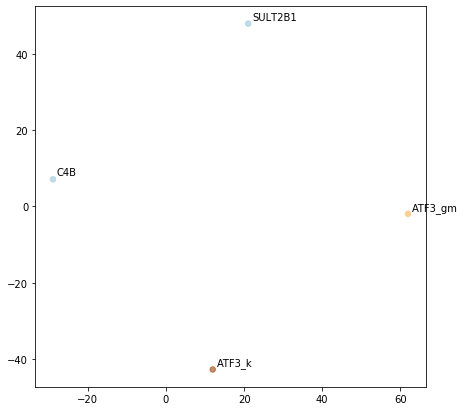

In [94]:
from matplotlib import pyplot as plt

sample_type = [1, 2, 0, 0]
sample_label = [sample_tf_name + '_gm', sample_tf_name + '_k', sample_gene1_name, sample_gene2_name]
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    sample_transformed[:, 0],
    sample_transformed[:, 1],
    c=sample_type,
    cmap="Paired",
    alpha=alpha,
    s=30,
)

for i, txt in enumerate(sample_label):
    ax.annotate(txt, (sample_transformed[i, 0] + 1, sample_transformed[i, 1] + 1))

In [45]:
sample_gene

[array([0.0005, 0.    , 0.    , 0.0034, 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0236, 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0597, 0.    ,
        0.    , 0.2146, 0.    , 0.3088, 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.1205, 0.217 , 0.    , 0.    , 0.    , 0.3837, 0.2959,
        0.    , 0.    , 0.0096, 0.    , 0.4081, 0.0927, 0.    , 0.    ,
        0.1518, 0.    , 0.0889, 0.1967, 0.5173, 0.2134, 0.    , 0.    ]),
 array([0.0076, 0.    , 0.    , 0.3776, 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.1969, 0.    , 0.    , 0.1132, 0.    , 0.    ,
        0.1622, 0.    , 0.    , 0.    , 0.    , 0.2159, 0.    , 0.3292,
        0.5167, 0.    , 0.    , 0.2357, 0.    , 0.    , 0.2221, 0.    ,
        0.0015, 0.0438, 0.    , 0.    , 0.    , 0.0006, 0.    , 0.    ,
        0.    , 0.0384, 0.1372, 0.0028, 0.    , 0.    , 0.1769

In [ ]:
from sklearn.manifold import TSNE
trans = TSNE(n_components=2)
emb_transformed = pd.DataFrame(trans.fit_transform(all_embeddings), index=G.nodes())